In [1]:
## import libraries
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import xgboost as xgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/253.9 MB 15.8 MB/s eta 0:00:17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/253.9 MB 22.3 MB/s eta 0:00:12

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/253.9 MB 35.0 MB/s eta 0:00:08

     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/253.9 MB 45.0 MB/s eta 0:00:06

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/253.9 MB 79.7 MB/s eta 0:00:04

     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/253.9 MB 158.8 MB/s eta 0:00:02

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/253.9 MB 160.6 MB/s eta 0:00:02

     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/253.9 MB 173.0 MB/s eta 0:00:02

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/253.9 MB 173.2 MB/s eta 0:00:02

     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/253.9 MB 166.6 MB/s eta 0:00:02

     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/253.9 MB 171.7 MB/s eta 0:00:02

     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/253.9 MB 175.0 MB/s eta 0:00:02

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/253.9 MB 172.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 94.2/253.9 MB 164.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 100.2/253.9 MB 170.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 112.3/253.9 MB 176.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 118.5/253.9 MB 177.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 129.2/253.9 MB 154.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 133.2/253.9 MB 132.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 145.3/253.9 MB 174.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 151.3/253.9 MB 174.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 157.4/253.9 MB 177.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 169.9/253.9 MB 181.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 176.0/253.9 MB 178.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 188.2/253.9 MB 177.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 194.1/253.9 MB 174.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 206.5/253.9 MB 179.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 212.5/253.9 MB 176.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 224.7/253.9 MB 176.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 230.7/253.9 MB 175.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 242.7/253.9 MB 173.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 248.9/253.9 MB 173.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 177.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Global parameters
TRAIN_SAMPLE_FRAC = 0.2  
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
# Load parquet files
train = pd.read_parquet('/kaggle/input/aeroclub-recsys-2025/train.parquet')
test = pd.read_parquet('/kaggle/input/aeroclub-recsys-2025/test.parquet')

In [4]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")
print(f"Unique ranker_ids in train: {train['ranker_id'].nunique():,}")
print(f"Selected rate: {train['selected'].mean():.3f}")

Train shape: (18145372, 126), Test shape: (6897776, 125)


Unique ranker_ids in train: 105,539


Selected rate: 0.006


In [5]:
## sample by ranker_id
if TRAIN_SAMPLE_FRAC < 1.0:
    unique_rankers = train['ranker_id'].unique()
    n_sample = int(len(unique_rankers) * TRAIN_SAMPLE_FRAC)
    sampled_rankers = np.random.RandomState(RANDOM_STATE).choice(
        unique_rankers, size=n_sample, replace=False
    )
    train = train[train['ranker_id'].isin(sampled_rankers)]
    print(f"Sampled train to {len(train):,} rows ({train['ranker_id'].nunique():,} groups)")

Sampled train to 3,631,409 rows (21,107 groups)


In [6]:
# Convert ranker_id to string for CatBoost for the process
train['ranker_id'] = train['ranker_id'].astype(str)
test['ranker_id'] = test['ranker_id'].astype(str)

In [7]:
# Define categorical features there 
cat_features = [
    'nationality', 'searchRoute', 'corporateTariffCode',
    # Leg 0 segments 0-1
    'legs0_segments0_aircraft_code', 'legs0_segments0_arrivalTo_airport_city_iata',
    'legs0_segments0_arrivalTo_airport_iata', 'legs0_segments0_departureFrom_airport_iata',
    'legs0_segments0_marketingCarrier_code', 'legs0_segments0_operatingCarrier_code',
    'legs0_segments1_aircraft_code', 'legs0_segments1_arrivalTo_airport_city_iata',
    'legs0_segments1_arrivalTo_airport_iata', 'legs0_segments1_departureFrom_airport_iata',
    'legs0_segments1_marketingCarrier_code', 'legs0_segments1_operatingCarrier_code',
    # Leg 1 segments 0-1
    'legs1_segments0_aircraft_code', 'legs1_segments0_arrivalTo_airport_city_iata',
    'legs1_segments0_arrivalTo_airport_iata', 'legs1_segments0_departureFrom_airport_iata',
    'legs1_segments0_marketingCarrier_code', 'legs1_segments0_operatingCarrier_code',
    'legs1_segments1_aircraft_code', 'legs1_segments1_arrivalTo_airport_city_iata',
    'legs1_segments1_arrivalTo_airport_iata', 'legs1_segments1_departureFrom_airport_iata',
    'legs1_segments1_marketingCarrier_code', 'legs1_segments1_operatingCarrier_code'
]

In [8]:
def duration_to_minutes(duration_str):
    """Convert time format (HH:MM:SS) to minutes"""
    if pd.isna(duration_str) or duration_str is None:
        return np.nan
    try:
        parts = str(duration_str).split(':')
        if len(parts) == 3:
            hours, minutes, seconds = map(int, parts)
            return hours * 60 + minutes + seconds / 60
        return np.nan
    except:
        return np.nan

def create_features(df):
    """Create features for flight ranking"""
    # Convert duration columns to minutes
    duration_cols = ['legs0_duration', 'legs1_duration']
    for leg in [0, 1]:
        for seg in range(4):
            duration_cols.append(f'legs{leg}_segments{seg}_duration')
    
    for col in duration_cols:
        if col in df.columns:
            df[col] = df[col].apply(duration_to_minutes)
    
    # Price features
    df['price_per_tax'] = df['totalPrice'] / (df['taxes'] + 1)
    df['tax_rate'] = df['taxes'] / (df['totalPrice'] + 1)
    
    # Duration features
    df['total_duration'] = df['legs0_duration'].fillna(0) + df['legs1_duration'].fillna(0)
    df['duration_ratio'] = df['legs0_duration'] / (df['legs1_duration'].fillna(df['legs0_duration']) + 1)
    
    # Count segments
    for leg in [0, 1]:
        segments = [f'legs{leg}_segments{i}_duration' for i in range(2)]
        df[f'n_segments_leg{leg}'] = df[segments].notna().sum(axis=1)
    df['total_segments'] = df['n_segments_leg0'] + df['n_segments_leg1']
    
    # Trip type
    df['is_one_way'] = df['legs1_duration'].isna().astype(int)
    
    # Ranking features within group
    df['price_rank'] = df.groupby('ranker_id')['totalPrice'].rank()
    df['price_pct_rank'] = df.groupby('ranker_id')['totalPrice'].rank(pct=True)
    df['duration_rank'] = df.groupby('ranker_id')['total_duration'].rank()
    
    # Binary features
    df['frequentFlyer'] = pd.to_numeric(df['frequentFlyer'], errors='coerce').fillna(0)
    df['is_vip_freq'] = ((df['isVip'] == 1) | (df['frequentFlyer'] == 1)).astype(int)
    df['has_return'] = (~df['legs1_duration'].isna()).astype(int)
    df['has_corporate_tariff'] = (~df['corporateTariffCode'].isna()).astype(int)
    
    # Baggage allowance
    df['baggage_total'] = (df['legs0_segments0_baggageAllowance_quantity'].fillna(0) + 
                          df['legs1_segments0_baggageAllowance_quantity'].fillna(0))
    
    # Fees
    df['total_fees'] = (df['miniRules0_monetaryAmount'].fillna(0) + 
                       df['miniRules1_monetaryAmount'].fillna(0))
    df['has_fees'] = (df['total_fees'] > 0).astype(int)
    df['fee_rate'] = df['total_fees'] / (df['totalPrice'] + 1)
    
    # Time features
    for col in ['legs0_departureAt', 'legs0_arrivalAt', 'legs1_departureAt', 'legs1_arrivalAt']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f'{col}_hour'] = df[col].dt.hour
            df[f'{col}_weekday'] = df[col].dt.weekday
    
    # Direct flight features
    df['is_direct_leg0'] = (df['n_segments_leg0'] == 1).astype(int)
    df['is_direct_leg1'] = (df['n_segments_leg1'] == 1).astype(int)
    df['both_direct'] = (df['is_direct_leg0'] & df['is_direct_leg1']).astype(int)
    
    # Access features
    df['has_access_tp'] = (df['pricingInfo_isAccessTP'] == 1).astype(int)
    
    # Handle categorical NaNs
    for col in cat_features:
        if col in df.columns:
            if df[col].dtype.name == 'Int64':
                df[col] = df[col].astype('Int64').astype(str).replace('<NA>', 'missing')
            else:
                df[col] = df[col].fillna('missing').astype(str)
    
    # Cabin class features
    df['avg_cabin_class'] = df[['legs0_segments0_cabinClass', 'legs1_segments0_cabinClass']].mean(axis=1)
    df['cabin_class_diff'] = df['legs0_segments0_cabinClass'] - df['legs1_segments0_cabinClass']
    
    return df

In [9]:
# feature engineering applied
train = create_features(train)
test = create_features(test)

In [10]:
# Columns excluded
exclude_cols = ['Id', 'ranker_id', 'selected', 'profileId', 'requestDate',
                'legs0_departureAt', 'legs0_arrivalAt', 'legs1_departureAt', 'legs1_arrivalAt',
                'miniRules0_percentage', 'miniRules1_percentage',  # >90% missing
                'frequentFlyer']  # Already processed

# Exclude segment 2-3 columns (>98% missing)
for leg in [0, 1]:
    for seg in [2, 3]:
        for suffix in ['aircraft_code', 'arrivalTo_airport_city_iata', 'arrivalTo_airport_iata',
                      'baggageAllowance_quantity', 'baggageAllowance_weightMeasurementType',
                      'cabinClass', 'departureFrom_airport_iata', 'duration', 'flightNumber',
                      'marketingCarrier_code', 'operatingCarrier_code', 'seatsAvailable']:
            exclude_cols.append(f'legs{leg}_segments{seg}_{suffix}')

feature_cols = [col for col in train.columns if col not in exclude_cols]
cat_features_final = [col for col in cat_features if col in feature_cols]

print(f"Using {len(feature_cols)} features ({len(cat_features_final)} categorical)")

Using 98 features (27 categorical)


In [11]:
# Preparing data
X_train = train[feature_cols]
y_train = train['selected']
groups_train = train['ranker_id']

X_test = test[feature_cols]
groups_test = test['ranker_id']

# Group-based splited
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)
train_idx, val_idx = next(gss.split(X_train, y_train, groups_train))

X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
groups_tr, groups_val = groups_train.iloc[train_idx], groups_train.iloc[val_idx]

print(f"Train: {len(X_tr):,} rows, Val: {len(X_val):,} rows, Test: {len(X_test):,} rows")

Train: 2,911,412 rows, Val: 719,997 rows, Test: 6,897,776 rows


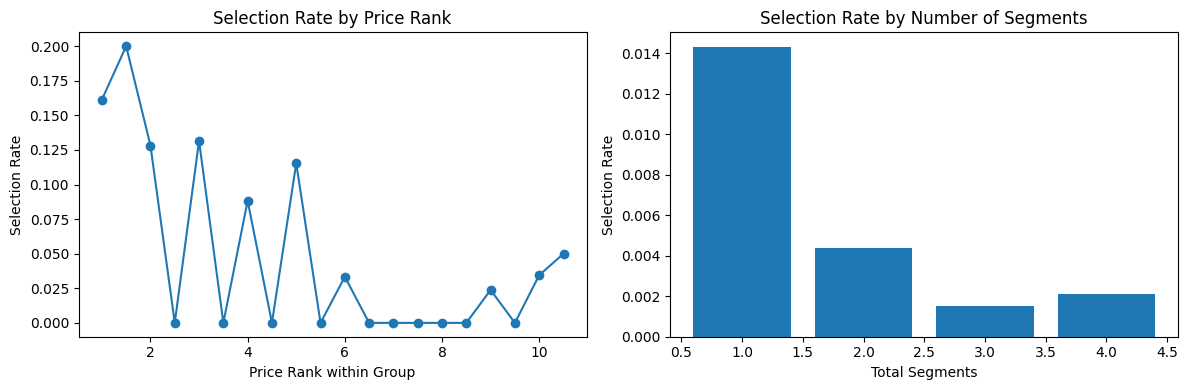

In [12]:
# Quick data exploration
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Selection rate by price rank
train_sample = train.sample(min(10000, len(train)))
price_rank_selection = train_sample.groupby('price_rank')['selected'].mean()
axes[0].plot(price_rank_selection.index[:20], price_rank_selection.values[:20], marker='o')
axes[0].set_xlabel('Price Rank within Group')
axes[0].set_ylabel('Selection Rate')
axes[0].set_title('Selection Rate by Price Rank')

# Direct vs connecting flights
direct_selection = train.groupby('total_segments')['selected'].mean()
axes[1].bar(direct_selection.index, direct_selection.values)
axes[1].set_xlabel('Total Segments')
axes[1].set_ylabel('Selection Rate')
axes[1].set_title('Selection Rate by Number of Segments')

plt.tight_layout()
plt.show()

In [13]:
# MOdel Training
for df in [X_tr, X_val, X_test]:
    for col in df.columns:
        if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
            df[col], _ = pd.factorize(df[col])

/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])
/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])
/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


/tmp/ipykernel_74/2225795395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


In [14]:
group_sizes_tr = groups_tr.value_counts().sort_index().tolist()
group_sizes_val = groups_val.value_counts().sort_index().tolist()

dtrain = xgb.DMatrix(X_tr, label=y_tr)
dtrain.set_group(group_sizes_tr)

dval = xgb.DMatrix(X_val, label=y_val)
dval.set_group(group_sizes_val)

In [15]:
params = {
    "objective": "rank:pairwise",
    "learning_rate": 0.1,
    "max_depth": 6,
    "eval_metric": "ndcg@3",  # or "map@3"
    "random_state": RANDOM_STATE,
    "tree_method": "hist"  # Use 'gpu_hist' if GPU available
}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-ndcg@3:0.77994	val-ndcg@3:0.78048


[10]	train-ndcg@3:0.80459	val-ndcg@3:0.79749

[20]	train-ndcg@3:0.81086	val-ndcg@3:0.80248

[30]	train-ndcg@3:0.81412	val-ndcg@3:0.80435

[40]	train-ndcg@3:0.81779	val-ndcg@3:0.80525


[50]	train-ndcg@3:0.82121	val-ndcg@3:0.80702

[60]	train-ndcg@3:0.82420	val-ndcg@3:0.80790

[70]	train-ndcg@3:0.82731	val-ndcg@3:0.80896


[80]	train-ndcg@3:0.83088	val-ndcg@3:0.80946

[90]	train-ndcg@3:0.83377	val-ndcg@3:0.81081

[100]	train-ndcg@3:0.83682	val-ndcg@3:0.81104

[110]	train-ndcg@3:0.83957	val-ndcg@3:0.81313

[120]	train-ndcg@3:0.84213	val-ndcg@3:0.81270

[130]	train-ndcg@3:0.84535	val-ndcg@3:0.81242

[135]	train-ndcg@3:0.84639	val-ndcg@3:0.81293

In [16]:
#Model Evaluation
# Test prediction
dtest = xgb.DMatrix(X_test)
test_preds = model.predict(dtest)

# Validation prediction for metric
dval_full = xgb.DMatrix(X_val)
val_preds = model.predict(dval_full)

# Evaluation
def sigmoid(x):
    return 1 / (1 + np.exp(-x / 10))

val_df = pd.DataFrame({
    'ranker_id': groups_val,
    'pred': val_preds,
    'selected': y_val
})

top_preds = val_df.loc[val_df.groupby('ranker_id')['pred'].idxmax()]
top_preds['prob'] = sigmoid(top_preds['pred'])

val_logloss = log_loss(top_preds['selected'], top_preds['prob'])
val_accuracy = (top_preds['selected'] == 1).mean()

print(f"Validation metrics:")
print(f"LogLoss: {val_logloss:.4f}")
print(f"Top-1 Accuracy: {val_accuracy:.4f}")

Validation metrics:
LogLoss: 0.7003
Top-1 Accuracy: 0.2662


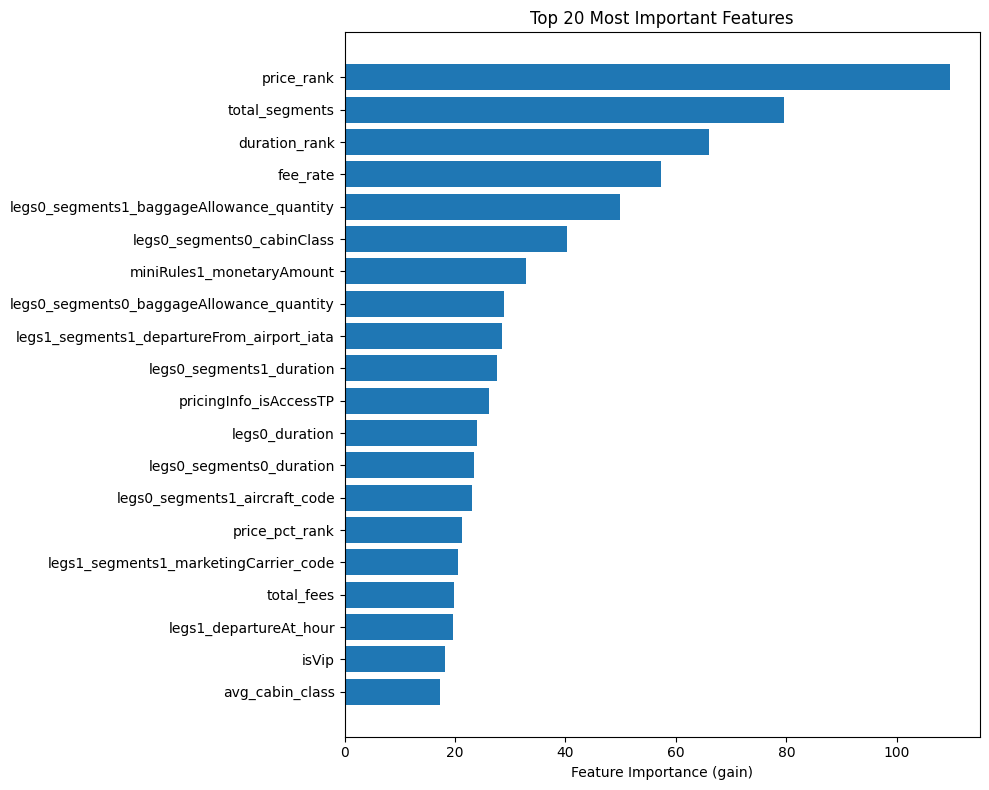

In [17]:
# Feature importance
importance_dict = model.get_score(importance_type='gain')
feature_importance = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'importance': list(importance_dict.values())
}).sort_values(by='importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (gain)')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:
# Generatng Predictions
group_sizes_test = groups_test.value_counts().sort_index().tolist()
dtest = xgb.DMatrix(X_test)
dtest.set_group(group_sizes_test)

test_preds = model.predict(dtest)

In [19]:
# Creating submission
submission = test[['Id', 'ranker_id']].copy()
submission['pred_score'] = test_preds

# Assigning ranks (1 = best option)
submission['selected'] = submission.groupby('ranker_id')['pred_score'].rank(
    ascending=False, method='first'
).astype(int)

In [20]:
# Verify ranking integrity
assert submission.groupby('ranker_id')['selected'].apply(
    lambda x: sorted(x.tolist()) == list(range(1, len(x)+1))
).all(), "Invalid ranking!"

In [21]:
# Saving submission
# submission[['Id', 'ranker_id', 'selected']].to_parquet('submission.parquet', index=False)
submission[['Id', 'ranker_id', 'selected']].to_csv('submission_xgboost.csv', index=False)
print(f"Submission saved. Shape: {submission.shape}")

Submission saved. Shape: (6897776, 4)
